In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
# Estilos de Seaborn
sns.set()
sns.set_palette(palette='colorblind')
%matplotlib inline


## Analisis conversion

In [2]:
tipos_conv = {"mes": np.int8,
             "anio": np.int16,
             "USER_ID": np.int64}

In [4]:
conversiones = pd.read_csv('../data/conversiones.csv',dtype = tipos_conv)

In [5]:
conversiones.head()

,mes,anio,USER_ID
0,7,2018,1410
1,8,2018,10755
2,8,2018,8270
3,10,2018,7558
4,9,2018,10731


In [28]:
conversiones.shape

(1738, 3)

#### 1738 conversiones 

### ¿Hay valores nulos? 

In [7]:
conversiones.isnull().sum()

mes        0
anio       0
USER_ID    0
dtype: int64

### ¿Es de un mismo año?

In [51]:
conversiones["anio"].nunique()

1

#### Todas del 2018

### ¿Cual es el top 5 de usuarios con más conversión?

In [13]:
conversiones.groupby("USER_ID").agg({"mes": "count"}).nlargest(columns = "mes", n = 10)

,mes
USER_ID,
7088,24
8934,13
8270,12
8333,10
681,8
1493,8
4116,7
10756,7
437,6


#### El máximo numero de conversiones por usuario en todo el año es 24


### ------¿Numero máximo de conversiones por usuario en un trimestre? ---- (hacer)

### Conversiones a traves de los meses

In [18]:
conv_mes = conversiones['mes'].value_counts().sort_index(ascending=True)

Text(0.5, 0.98, 'Conversiones a traves de los meses')

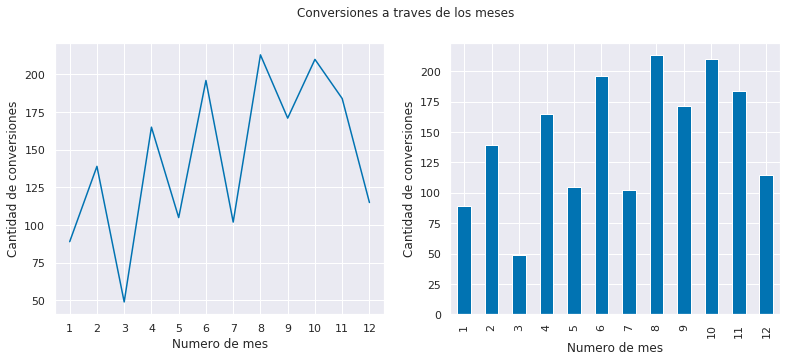

In [48]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (13,5))
#Plot lineas
ax1.plot(conv_mes)
ax1.set_xticks(conv_mes.index)
ax1.set_ylabel("Cantidad de conversiones")
ax1.set_xlabel("Numero de mes")

#Plot barras
conv_mes.plot(kind='bar', ax = ax2)
plt.ylabel("Cantidad de conversiones")
plt.xlabel("Numero de mes")

plt.suptitle("Conversiones a traves de los meses")


### Se observa una distribucion muy irregular en las conversiones a traves de los meses
#### __Minimo__: Marzo - 1er Trimestre
#### __Maximo__: Agosto - 3er Trimestre

### Un patron que se ve es que el número de conversiones tiende a realizar un descenso luego de cada mes donde se supero al anterior, además en el ultimo trimestre se tiene un descenso de dos meses seguidos

---

## Device data

In [47]:
device_data=pd.read_csv('device_data.csv',dtype={'CONNECTION_SPEED':np.int8,'IS_MOBILE_DEVICE':bool,'USER_ID':np.int64})
device_data['FEC_EVENT']=pd.to_datetime(device_data['FEC_EVENT'])
device_data.head()

,FEC_EVENT,CONNECTION_SPEED,IS_MOBILE_DEVICE,USER_ID
0,2018-11-22 10:15:38,1,True,0
1,2018-09-11 09:39:41,1,True,0
2,2018-11-29 16:29:03,3,True,0
3,2018-05-16 21:12:54,3,True,0
4,2018-10-12 19:28:23,3,True,0


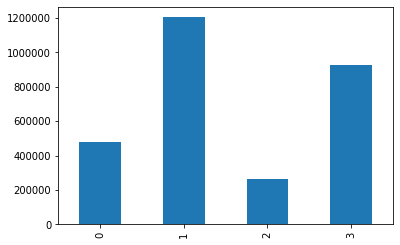

In [49]:
device_data['CONNECTION_SPEED'].value_counts().sort_index(ascending=True).plot(kind='bar')

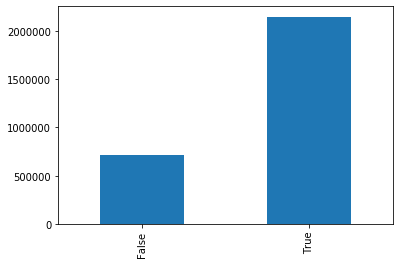

In [50]:
device_data['IS_MOBILE_DEVICE'].value_counts().sort_index(ascending=True).plot(kind='bar')

In [51]:
device_data['USER_ID'].value_counts().shape

(11676,)

In [52]:
#Todas las fechas son de 2018
device_data['FEC_EVENT'].dt.year.value_counts()

2018    2871406
Name: FEC_EVENT, dtype: int64

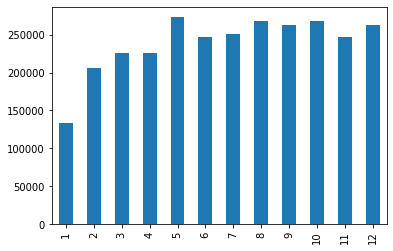

In [53]:
device_data['FEC_EVENT'].dt.month.value_counts().sort_index(ascending=True).plot(kind='bar')

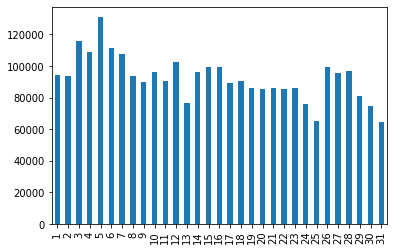

In [54]:
device_data['FEC_EVENT'].dt.day.value_counts().sort_index(ascending=True).plot(kind='bar')

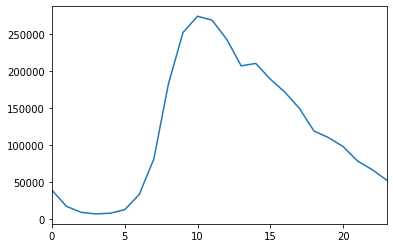

In [55]:
device_data['FEC_EVENT'].dt.hour.value_counts().sort_index(ascending=True).plot(kind='line')

In [6]:
pageviews=pd.read_pickle('pageviews_formateado.pkl')
pageviews.head()

,FEC_EVENT,PAGE,CONTENT_CATEGORY,CONTENT_CATEGORY_TOP,CONTENT_CATEGORY_BOTTOM,SITE_ID,ON_SITE_SEARCH_TERM,USER_ID
0,2018-03-30 07:35:48,1,1,1,1,1,1,0
1,2018-03-30 07:35:52,2,2,2,2,2,1,0
2,2018-03-30 07:36:11,3,2,2,2,3,1,0
3,2018-03-30 07:36:16,4,2,2,2,3,1,0
4,2018-03-30 07:41:38,5,2,2,2,2,1,0


In [10]:
#Hay 1725 paginas distintas
pageviews['PAGE'].value_counts().shape

(1725,)

In [15]:
#Datos de 11676 usuarios (igual que en device_data)
pageviews['USER_ID'].value_counts().shape

(11676,)

In [58]:
#supongo que ON_SITE_SEARCH_TERM dice cuantas veces el usuario busco algo en la pagina una vez que entró
pageviews['ON_SITE_SEARCH_TERM'].value_counts()

1      17936402
49           25
32           11
89           10
36           10
76            8
29            7
90            7
78            7
55            7
31            7
129           7
21            6
43            6
18            5
128           5
85            5
14            5
192           5
71            5
63            4
6             4
57            4
4             4
11            4
148           4
172           4
187           4
41            4
50            4
         ...   
195           1
208           1
207           1
206           1
205           1
204           1
203           1
202           1
201           1
200           1
199           1
198           1
197           1
196           1
193           1
175           1
191           1
190           1
189           1
186           1
185           1
184           1
183           1
182           1
181           1
179           1
178           1
177           1
176           1
147           1
Name: ON_SITE_SEARCH_TER